In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'F:\Python 3.9.7\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

In [3]:
stock_data = pd.read_csv('CYIENT.NS.csv')
# stock_data = yf.download('LT.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('HCL',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('WIPRO.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('TECHM.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('REDINGTON.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('ITC',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('CYIENT.NS',start='2012-01-01',end='2022-12-31')

In [4]:
stock_data.parse_dates=True

In [5]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,111.949997,114.500000,105.699997,110.900002,84.214729,9283.0
1,2012-01-03,110.650002,116.000000,106.650002,111.849998,84.936127,15330.0
2,2012-01-04,110.000000,116.250000,108.099998,115.199997,87.480042,5844.0
3,2012-01-05,115.300003,116.400002,112.050003,114.099998,86.644730,12400.0
4,2012-01-06,114.900002,114.900002,110.150002,113.349998,86.075180,1368.0


In [6]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2714,2022-12-26,785.000000,819.700012,780.700012,814.500000,814.500000,93019.0
2715,2022-12-27,818.799988,823.000000,810.000000,816.549988,816.549988,34735.0
2716,2022-12-28,814.000000,826.799988,811.650024,821.200012,821.200012,49240.0
2717,2022-12-29,813.799988,823.450012,812.849976,817.049988,817.049988,35258.0
2718,2022-12-30,821.400024,828.450012,808.000000,811.049988,811.049988,44925.0


In [7]:
stock_data.shape

(2719, 7)

In [8]:
#stock_data.dropna()

In [9]:
# Replacing infinite with nan
stock_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
stock_data.dropna(inplace=True)

# Printing df
stock_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,111.949997,114.500000,105.699997,110.900002,84.214729,9283.0
1,2012-01-03,110.650002,116.000000,106.650002,111.849998,84.936127,15330.0
2,2012-01-04,110.000000,116.250000,108.099998,115.199997,87.480042,5844.0
3,2012-01-05,115.300003,116.400002,112.050003,114.099998,86.644730,12400.0
4,2012-01-06,114.900002,114.900002,110.150002,113.349998,86.075180,1368.0
...,...,...,...,...,...,...,...
2714,2022-12-26,785.000000,819.700012,780.700012,814.500000,814.500000,93019.0
2715,2022-12-27,818.799988,823.000000,810.000000,816.549988,816.549988,34735.0
2716,2022-12-28,814.000000,826.799988,811.650024,821.200012,821.200012,49240.0
2717,2022-12-29,813.799988,823.450012,812.849976,817.049988,817.049988,35258.0


<AxesSubplot:>

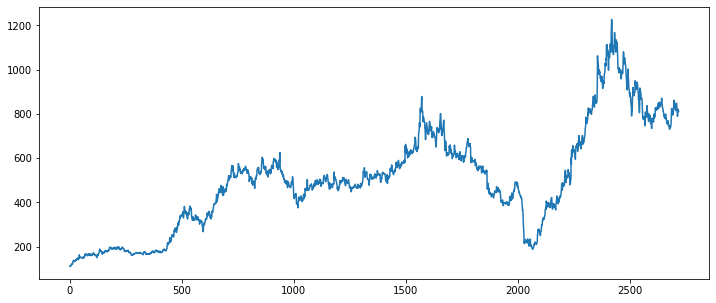

In [10]:
stock_data['Close'].plot(figsize=(12,5))

In [11]:
#check for stationary
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('1. ADF : ',dftest[0])
    print('2. P-Value : ',dftest[1])
    print('3. Num Of Lags : ',dftest[2])
    print('4. Num of Observation Used for ADF : ',dftest[3])
    print('5. Critical Values : ')
    for key, val in dftest[4].items():
        print('\t',key,':',val)

In [12]:
ad_test(stock_data['Close'])

1. ADF :  -1.4812534813322464
2. P-Value :  0.5427637536793843
3. Num Of Lags :  25
4. Num of Observation Used for ADF :  2687
5. Critical Values : 
	 1% : -3.4327860097199814
	 5% : -2.862616249081039
	 10% : -2.5673429234848517


In [13]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [14]:
stepwise_fit=auto_arima(stock_data['Close'],trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21200.376, Time=1.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21203.999, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21205.999, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21205.999, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21203.242, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21205.157, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21205.478, Time=0.96 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=21199.803, Time=1.00 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=21204.568, Time=0.37 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=21200.183, Time=1.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21203.496, Time=0.25 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2713
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -10594.675
Date:                Fri, 14 Apr 2023   AIC                          21199.350
Time:                        20:05:57   BIC                          21228.878
Sample:                             0   HQIC                         21210.026
                               - 2713                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7421      0.123      6.031      0.000       0.501       0.983
ma.L1         -0.7449      0.123     -6.046      0.000      -0.986      -0.503
ma.L2          0.0414      0.014      2.954      0.003       0.014       0.069
ma.L3         -0.0641      0.011     -5.697      0.000      -0.086      -0.042
sigma2       144.7922      1.589     91.122      0.000     141.678     147.907
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13647.32
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               5.35   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA2

In [16]:
stock_data.shape

(2713, 7)

In [17]:
train=stock_data.iloc[:-80]
test=stock_data.iloc[-20:]
print(train.shape,test.shape)

(2633, 7) (20, 7)


In [18]:
#train the model
model=ARIMA2(train['Close'],order=(1,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2633
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -10280.503
Date:                Fri, 14 Apr 2023   AIC                          20571.005
Time:                        20:05:57   BIC                          20600.383
Sample:                             0   HQIC                         20581.643
                               - 2633                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7437      0.121      6.121      0.000       0.506       0.982
ma.L1         -0.7450      0.122     -6.126      0.000      -0.983      -0.507
ma.L2          0.0390      0.014      2.768      0.006       0.011       0.067
ma.L3         -0.0636      0.011     -5.614      0.000      -0.086      -0.041
sigma2       144.6109      1.591     90.915      0.000     141.493     147.728
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14057.05
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.69   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
#testing
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=stock_data.index[start:end+1]
print(pred)

2639    846.061887
2640    846.512711
2641    846.180188
2642    845.932877
2643    845.748941
2644    845.612140
2645    845.510395
2646    845.434723
2647    845.378443
2648    845.336584
2649    845.305453
2650    845.282299
2651    845.265078
2652    845.252271
2653    845.242745
2654    845.235660
2655    845.230391
2656    845.226473
2657    845.223558
2658    845.221390
Name: predicted_mean, dtype: float64


<AxesSubplot:>

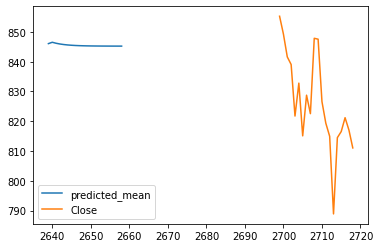

In [20]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [21]:
test['Close'].mean()

826.5824921999999

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
mse=mean_squared_error(pred,test['Close'])

In [24]:
rmse=sqrt(mean_squared_error(pred,test['Close']))

In [25]:
print(rmse)
print(mse)

24.551310306355184
602.7668377589422


In [26]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test['Close'], pred)
print(mape)

0.025228614809977696


In [27]:
model2=ARIMA2(stock_data['Close'],order=(1,1,3))
model2=model2.fit()

In [28]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2714,2022-12-26,785.000000,819.700012,780.700012,814.500000,814.500000,93019.0
2715,2022-12-27,818.799988,823.000000,810.000000,816.549988,816.549988,34735.0
2716,2022-12-28,814.000000,826.799988,811.650024,821.200012,821.200012,49240.0
2717,2022-12-29,813.799988,823.450012,812.849976,817.049988,817.049988,35258.0
2718,2022-12-30,821.400024,828.450012,808.000000,811.049988,811.049988,44925.0


In [ ]:
#Making future predictions (for the next 30 days)

In [29]:
pred=model2.predict(start=len(stock_data),end=len(stock_data)+30,typ='levels').rename('ARIMA Predictions')

In [30]:
print(pred)

2713    810.783433
2714    810.611392
2715    810.872538
2716    811.066345
2717    811.210178
2718    811.316922
2719    811.396141
2720    811.454933
2721    811.498564
2722    811.530945
2723    811.554977
2724    811.572811
2725    811.586047
2726    811.595870
2727    811.603160
2728    811.608570
2729    811.612585
2730    811.615565
2731    811.617776
2732    811.619418
2733    811.620636
2734    811.621540
2735    811.622210
2736    811.622708
2737    811.623078
2738    811.623352
2739    811.623555
2740    811.623706
2741    811.623819
2742    811.623902
2743    811.623963
Name: ARIMA Predictions, dtype: float64
